In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib as plt

housing = pd.read_csv(r"C:\Users\georg\Desktop\end_end\datasets\housing\housing.csv") # read file 
housing["income_category"] =pd.cut(housing["median_income"],bins=[0,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5]) 
# create income_category column

split_indices = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42) # use the StratifiedShuffleSplit to create indices

# create a train_set and a test_set based on the new column indices 
for train_index, test_index in split_indices.split(housing,housing["income_category"]): 
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index] 

In [10]:
# droping the income_category column to return to the original data 
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_category", axis=1, inplace=True)

### So far you have only taken a quick glance at the data to get a general understanding of the kind of data you are manipulating. Now the goal is to go a little bit more in depth.

In [14]:
# we want to explore only the training set and not look at the test set !!!
housing = strat_train_set.copy()   # pandas.copy() function creates a copy of the data independent of the original

In [15]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


#### Visualizing Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

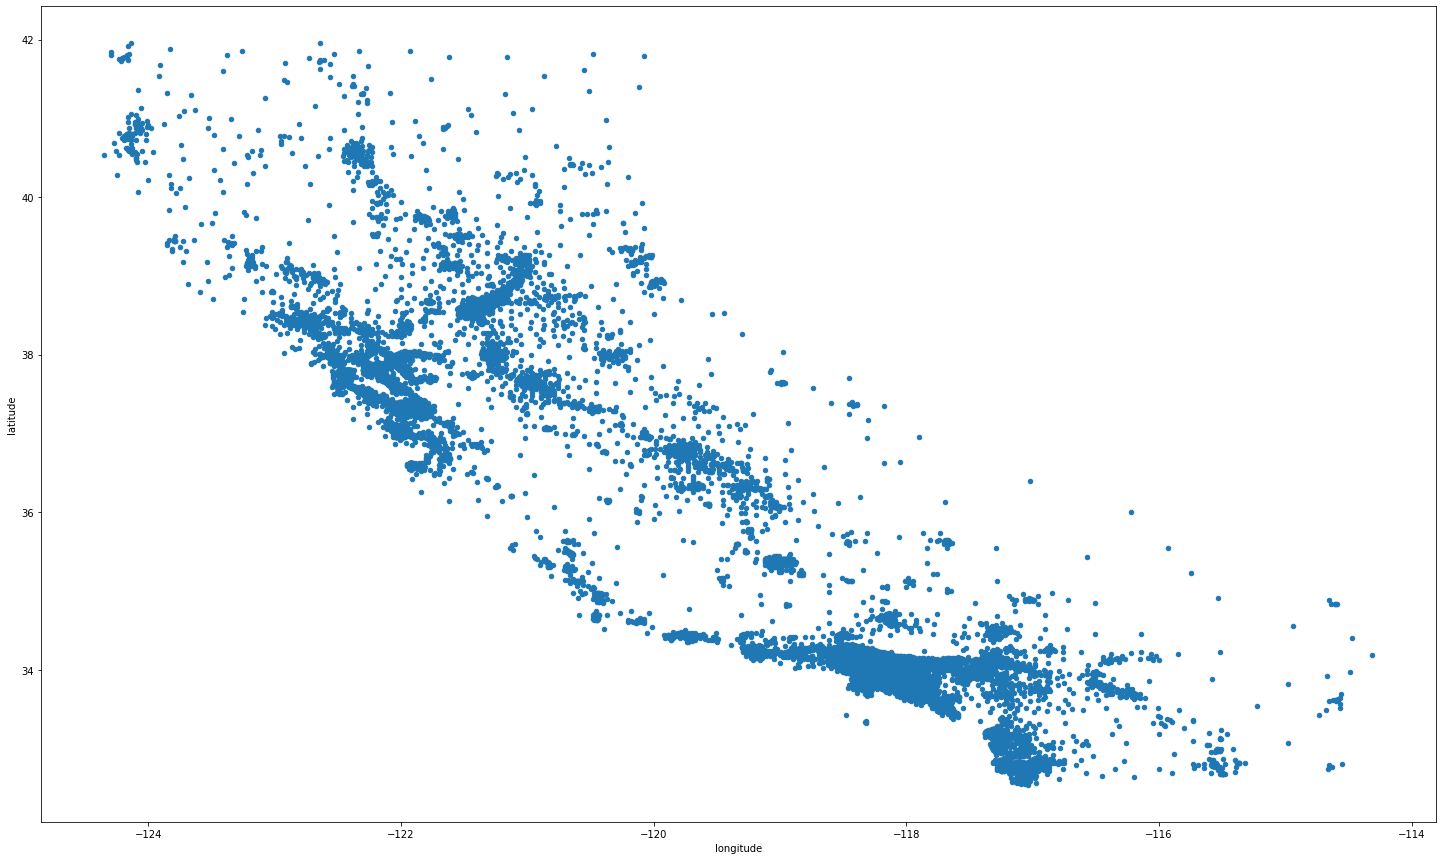

In [38]:
housing.plot(kind="scatter", x="longitude", y="latitude",figsize=(25,15))
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

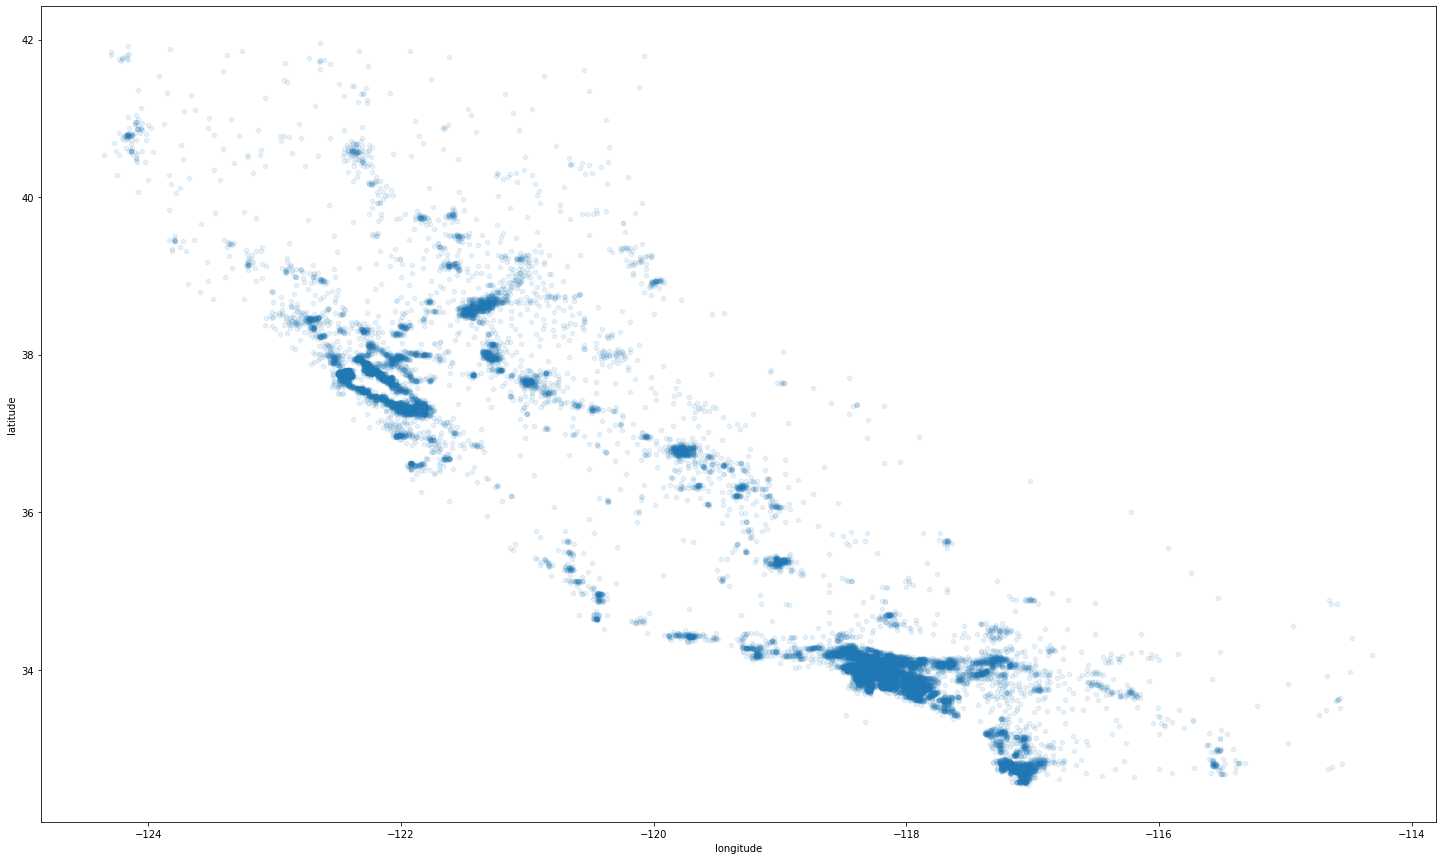

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude",figsize=(25,15),alpha=0.1)

##### you can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

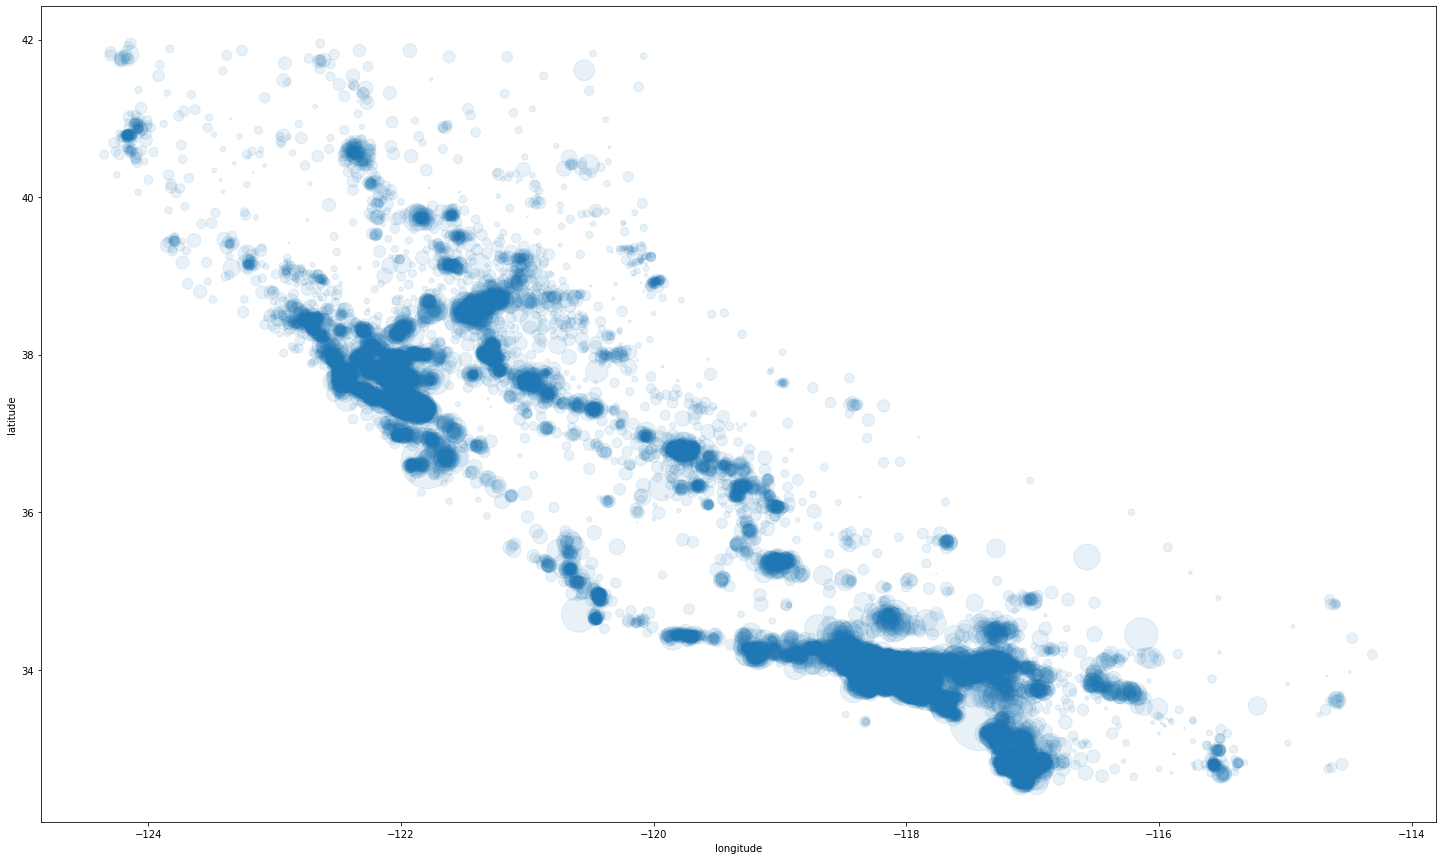

In [40]:
# the use of parameters s and c for the figure 2-13 from the book is a bit confusing let me explain:
# when u pass the type ="scatter" inside the plot function what really happens is .plot now uses the .scatter function in which
# u can see what each parameter does
# https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html

housing.plot(kind="scatter", x="longitude", y="latitude",figsize=(25,15),alpha=0.1,s=housing["population"]/10)
# so s parameter practically acts like a marker based on the target u give it in our case population , divided by 10
# because u can get to much noise in the plot with big numbers

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

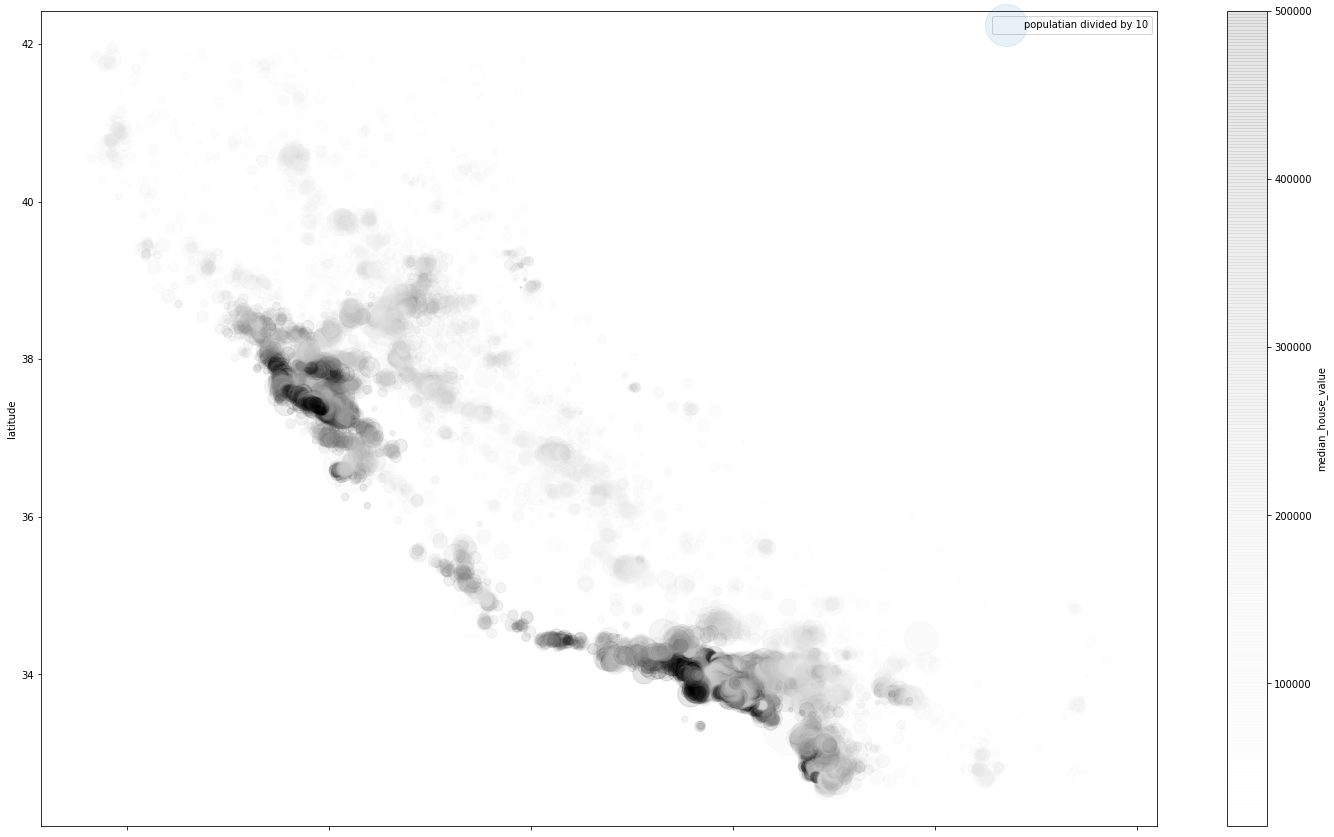

In [42]:
housing.plot(kind="scatter", x="longitude", y="latitude",figsize=(25,15),alpha=0.1,s=housing["population"]/10,label="populatian divided by 10",
            c="median_house_value")
# so c parameter acts like a second marker -but with color we did not define any color so its white-gray-black

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

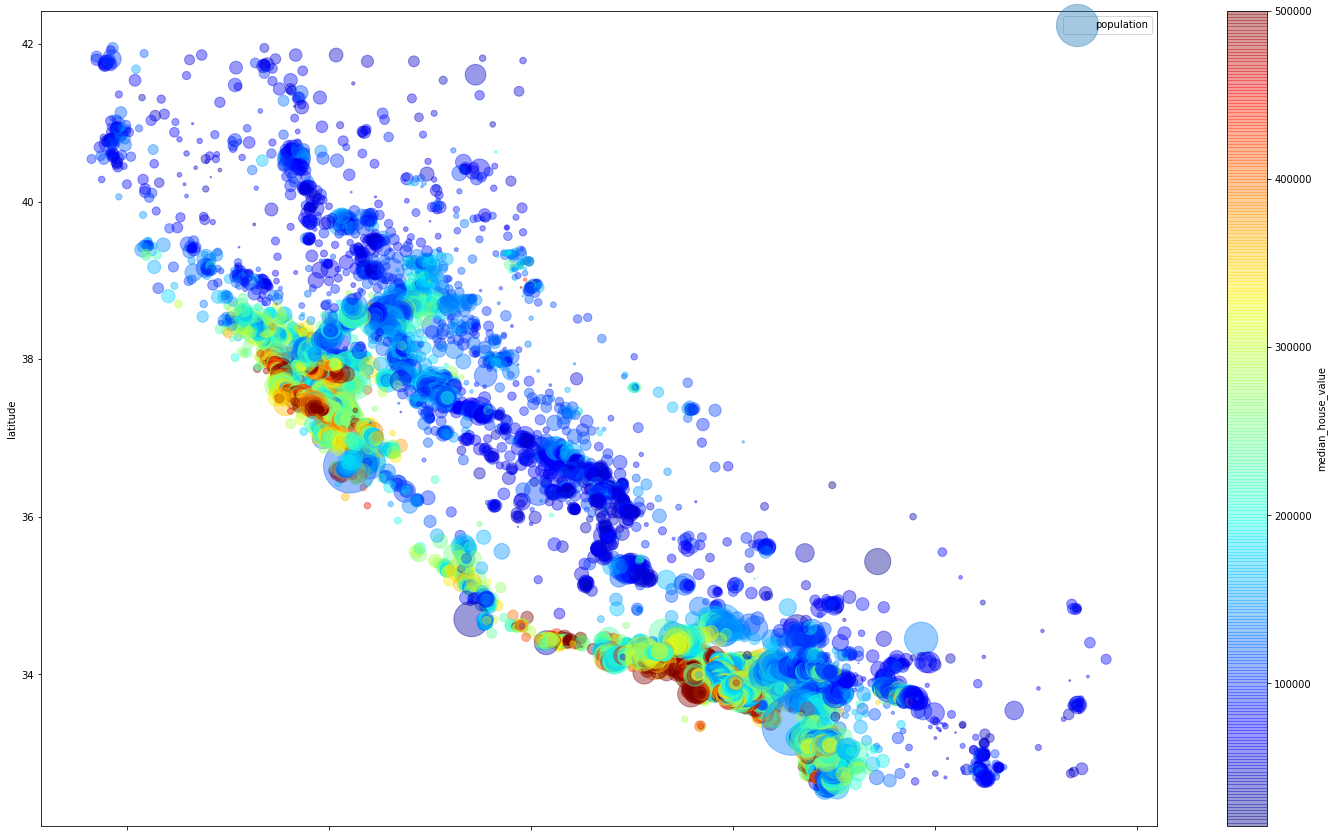

In [50]:
%matplotlib inline 
import matplotlib.pyplot as plt
#https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html

housing.plot(kind="scatter", x="longitude", y="latitude",figsize=(25,15),alpha=0.4,s=housing["population"]/10,
            label="population",c="median_house_value",cmap=plt.get_cmap("jet"))


# cmap = colormap  !! cmap is only used if c is an array of floats.
            

#### This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density, as you probably knew already.